<a href="https://colab.research.google.com/github/Asiri2000/Deep-learning-projects/blob/main/GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
x_test.shape

(10000, 28, 28)

In [18]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [53]:
x_train.shape

(60000, 784)

In [54]:
input_layer = Input(shape=(x_train.shape[1],))
encoder = Dense(units=16, activation='relu')(input_layer)
encoder = Dense(units=32, activation='relu')(encoder)
encoder = Dense(units=64, activation='relu')(encoder)

decoder = Dense(units=128, activation='relu')(encoder)
decoder = Dense(units=32, activation='relu')(decoder)
decoder = Dense(units=x_train.shape[1], activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [55]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,536 (209.12 KB)

 Trainable params: 53,536 (209.12 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
autoencoder.compile(optimizer='adam', loss='mse')

In [57]:
autoencoder.fit(x_train, x_train, epochs=60, validation_split=0.1, batch_size=64)

Epoch 1/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 7223.2510 - val_loss: 7182.0933
Epoch 2/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7226.6328 - val_loss: 7181.5107
Epoch 3/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7225.7192 - val_loss: 7181.5078
Epoch 4/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7204.5908 - val_loss: 7181.5078
Epoch 5/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7237.9321 - val_loss: 7181.5171
Epoch 6/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7232.3428 - val_loss: 7181.5186
Epoch 7/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7208.8906 - val_loss: 7181.5186
Epoch 8/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7221.5576 - val_loss: 7181.5205
Epoch 9/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7221.6035 - val_loss: 7181.5601
Epoch 10/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7212.9370 - val_loss: 7181.6113
Epoch 11/60
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7211.5581 - val_lo

In [60]:
prediction = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


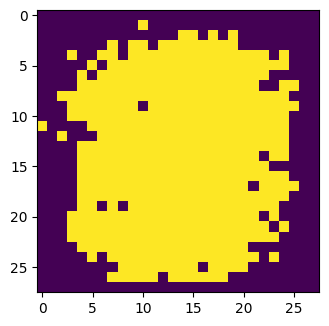

In [64]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.imshow(prediction[56].reshape(28,28))

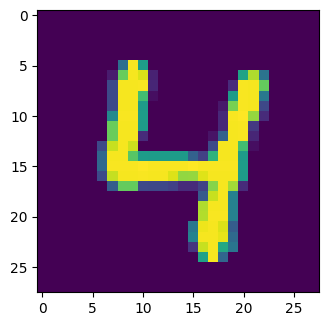

In [63]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[56].reshape(28,28))